In [57]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]
from Crypto.Cipher import DES, AES
from Crypto.Util.Padding import pad, unpad

In [58]:
def nextblocks(blocks):
    block = ('qwertyuiopasdfghjklzxcvbnm123456'*8)
    for _ in range(blocks):
        yield block

In [59]:
def create_files(sizes):
    for size in sizes:
        with open(f"text.{size}MB.txt", "w") as file:
            for block in nextblocks(size):
                file.write(block)

In [69]:
sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16535]

create_files(sizes)

df = pd.DataFrame(columns=['size', 'DES_Encryption', 'DES_Decryption' ,'AES_Encryption' ,'AES_Decryption'])
df['size'] = sizes

In [70]:
def timethis(function):
    def func(*args, **kwargs):        
        start = time()
        data  = function(*args, **kwargs)
        end = time()
        print(f'{function.__name__} executed in {end - start}')
        return (data, (end-start), )
    return func

In [71]:
def read_key():
    return input("Enter the key: ")

def read_iv():
    return input("Enter the initial vector: ")


In [72]:
@timethis
def encrypt(cipher, data):
    return cipher.encrypt(data)

@timethis
def decrypt(cipher, ciphertext):
    return cipher.decrypt(ciphertext)

In [73]:
#DES

def run_DES(key = None):
    
    if not key: key = read_key().encode('utf-8')

    files = [f'text.{size}MB.txt' for size in sizes]
    encryption_times = []
    decryption_times = []
    
    for file_name in files:
        des = DES.new(pad(key, block_size=DES.block_size), mode=DES.MODE_ECB)

        with open(file_name,'r') as f:
            file_contents = f.read().encode('utf-8')
            
        print('File:', file_name)
        
        padded_file_contents = pad(file_contents, DES.block_size)    
        cipher_text, time_elapsed = encrypt(des, padded_file_contents)
        encryption_times.append(time_elapsed)
        
        decrypted, time_elapsed = decrypt(des, cipher_text)
        decrypted = unpad(decrypted, block_size=DES.block_size)
        decryption_times.append(time_elapsed)
        
        print('Successful:',file_contents == decrypted,'\n')
    
    df['DES_Encryption'] = encryption_times
    df['DES_Decryption'] = decryption_times    

In [74]:
run_DES()

Enter the key: 
File: text.1MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.2MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.4MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.8MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.16MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.32MB.txt
encrypt executed in 0.0
decrypt executed in 0.000997781753540039
Successful: True 

File: text.64MB.txt
encrypt executed in 0.000997304916381836
decrypt executed in 0.0
Successful: True 

File: text.128MB.txt
encrypt executed in 0.0
decrypt executed in 0.0009951591491699219
Successful: True 

File: text.256MB.txt
encrypt executed in 0.0009965896606445312
decrypt executed in 0.0009975433349609375
Successful: True 

File: text.512MB.txt
encrypt executed in 0.001993894577026367
decrypt executed in 0.0019965171813964844
Successful:

In [75]:
# AES

def run_AES(key=None):
    
    if not key: key = read_key().encode('utf-8')

    files = [f'text.{size}MB.txt' for size in sizes]
    encryption_times = []
    decryption_times = []
    
    for file_name in files:
        
        aes = AES.new(pad(key, AES.block_size), AES.MODE_ECB)

        with open(file_name,'r') as f:
            file_contents = f.read().encode('utf-8')

        print('File:', file_name)
        
        padded_file_contents = pad(file_contents, AES.block_size)
        cipher_text, time_elapsed = encrypt(aes, padded_file_contents)
        encryption_times.append(time_elapsed)

        decrypted, time_elapsed = decrypt(aes, cipher_text)
        decrypted = unpad(decrypted, AES.block_size)
        decryption_times.append(time_elapsed)
        
        print('Successful:',file_contents == decrypted, '\n')
        
    df['AES_Encryption'] = encryption_times
    df['AES_Decryption'] = decryption_times 

In [76]:
run_AES()

Enter the key: 
File: text.1MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.2MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.4MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.8MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.16MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.32MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.64MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.128MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.256MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.512MB.txt
encrypt executed in 0.0
decrypt executed in 0.0
Successful: True 

File: text.1024MB.txt
encrypt executed in 0.0
decrypt executed in 0.0009951591491699219
Successful: True 

File: te

<Figure size 960x480 with 0 Axes>

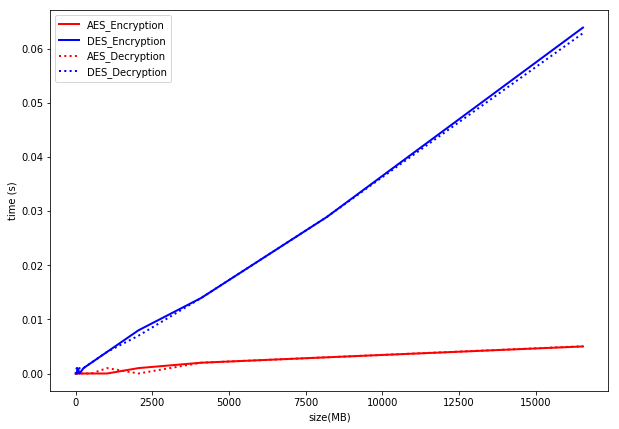

<Figure size 960x480 with 0 Axes>

In [77]:
plt.plot( 'size','AES_Encryption', data=df, marker='', color='red', linewidth=2)
plt.plot( 'size','DES_Encryption', data=df, marker='', color='blue', linewidth=2)
plt.plot( 'size','AES_Decryption', data=df, marker='', color='red', linewidth=2,  linestyle=':')
plt.plot( 'size','DES_Decryption', data=df, marker='', color='blue', linewidth=2,  linestyle=':')
plt.legend()
plt.ylabel('time (s)')
plt.xlabel('size(MB)')
plt.figure(figsize=(12,6), dpi= 80)

In [78]:
def read_file(file_name):
    with open(file_name,'r') as f:
        file_contents = f.read().encode('utf-8')
    print('File:', file_name)
    return file_contents

In [13]:
def read(key, iv):
    if not key: key = read_key().encode('utf-8')
    if not iv: iv = read_iv().encode('utf-8')
    return key, iv

In [41]:
def CBC(Cipher, key=None, iv=None):
    
    _pad = lambda data: pad(data, Cipher.block_size)
    
    key, iv = map(_pad, read(key, iv))
    
    block_size = Cipher.block_size
        
    sizes = [100]
    create_files(sizes)

    file_name = f'text.{sizes[0]}MB.txt'
    
    cipher_enc = Cipher.new(key=key, iv=iv, mode=Cipher.MODE_CBC)

    file_contents = read_file(file_name)

    padded_file_contents = pad(file_contents, block_size)
    cipher_text, enc_time_elapsed = encrypt(cipher_enc, padded_file_contents)
    
    cipher_dec = Cipher.new(key=key, iv=iv, mode=Cipher.MODE_CBC)

    decrypted, dec_time_elapsed = decrypt(cipher_dec, cipher_text)
    decrypted = unpad(decrypted, block_size)

    print(CBC.__name__, Cipher.__name__)
    print('Successful:',file_contents == decrypted, '\n')
    return (enc_time_elapsed, dec_time_elapsed)

In [42]:
def ECB(Cipher, key=None, iv=None):
    
    _pad = lambda data: pad(data, Cipher.block_size)
    key, iv = map(_pad, read(key, iv))
    
    block_size = Cipher.block_size
    sizes = [100]
    create_files(sizes)
    file_name = f'text.{sizes[0]}MB.txt'
    
    cipher_enc = Cipher.new(key=key, mode=Cipher.MODE_ECB)
    
    file_contents = read_file(file_name)

    padded_file_contents = pad(file_contents, block_size)
    cipher_text, enc_time_elapsed = encrypt(cipher_enc, padded_file_contents)
    
    cipher_dec = Cipher.new(key=key, mode=Cipher.MODE_ECB)

    decrypted, dec_time_elapsed = decrypt(cipher_dec, cipher_text)
    decrypted = unpad(decrypted, block_size)
    
    print(ECB.__name__, Cipher.__name__)
    print('Successful:',file_contents == decrypted, '\n')
    return (enc_time_elapsed, dec_time_elapsed)

In [43]:
def CTR(Cipher, key=None, iv=None):
    
    _pad = lambda data: pad(data, Cipher.block_size)
    key, iv = map(_pad, read(key, iv))
    
    block_size = Cipher.block_size

    sizes = [100]
    create_files(sizes)

    file_name = f'text.{sizes[0]}MB.txt'
    
    cipher_enc = Cipher.new(key=key, nonce=b'0' ,mode=Cipher.MODE_CTR)

    file_contents = read_file(file_name)

    padded_file_contents = pad(file_contents, block_size)
    cipher_text, enc_time_elapsed = encrypt(cipher_enc, padded_file_contents)
    
    cipher_dec = Cipher.new(key=key, nonce=b'0', mode=Cipher.MODE_CTR)

    decrypted, dec_time_elapsed = decrypt(cipher_dec, cipher_text)
    decrypted = unpad(decrypted, block_size)
    
    print(CTR.__name__, Cipher.__name__)
    print('Successful:',file_contents == decrypted, '\n')
    return (enc_time_elapsed, dec_time_elapsed)

In [ ]:
from Crypto.Cipher import DES, AES
from Crypto.Util.Padding import pad, unpad

In [ ]:
CTR(DES)
CTR(AES)